In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
customers = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Customers.csv')
transactions = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Transactions.csv')
products = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Products.csv')

In [17]:
data = pd.merge(pd.merge(transactions, products, on="ProductID", how="left"), customers, on="CustomerID", how="left")


In [18]:
# Step 3: Aggregate Features
category_data = data.groupby(['CustomerID', 'Category']).agg(
    total_spend_category=('Price_y', 'sum'),
    avg_spend_category=('Price_y', 'mean'),
    product_count=('Price_y', 'count')
).reset_index()


In [19]:
# Merge the aggregated data back with the customers
customer_profile = pd.merge(customers, category_data, on="CustomerID", how="left")

In [20]:
# Step 4: Define Features for Clustering
features = ['total_spend_category', 'avg_spend_category', 'product_count']

In [13]:
features = ['total_spend_category', 'avg_spend_category', 'product_count']

In [21]:
X = customer_profile[features]


In [22]:
# Impute missing values with the mean of each column
X_imputed = X.fillna(X.mean())

In [23]:
X_scaled = StandardScaler().fit_transform(X_imputed)

In [24]:
# Step 7: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profile['cluster'] = kmeans.fit_predict(X_scaled)


In [25]:
# Step 8: Calculate DB Index
db_index = davies_bouldin_score(X_scaled, customer_profile['cluster'])
print(f"DB Index: {db_index}")

DB Index: 0.8539834924173834


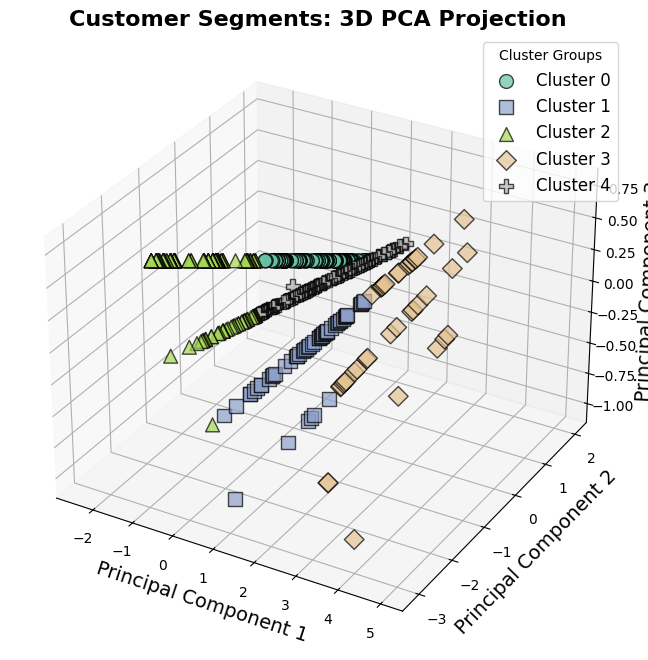

In [31]:
# Apply PCA for dimensionality reduction to 3 components
X_pca = PCA(n_components=3).fit_transform(X_scaled)

# Set up a color palette and markers for each cluster
unique_clusters = np.unique(customer_profile['cluster'])
markers = ['o', 's', '^', 'D', 'P', '*']  # Different markers for each cluster
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_clusters)))  # Distinct colors

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in 3D with distinct colors and markers
for i, cluster in enumerate(unique_clusters):
    cluster_data = X_pca[customer_profile['cluster'] == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               c=[colors[i]], marker=markers[i], s=100, label=f'Cluster {cluster}', 
               edgecolors='k', alpha=0.7)

# Set titles and labels
ax.set_title('Customer Segments: 3D PCA Projection', fontsize=16, fontweight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)

# Add a legend
ax.legend(title='Cluster Groups', fontsize=12)

# Show the plot
plt.show()

In [28]:
# Filter numeric columns
numeric_features = customer_profile[features].select_dtypes(include=['number']).columns

# Group by 'cluster' and calculate the mean for numeric features
print(customer_profile.groupby('cluster')[numeric_features].mean())

         total_spend_category  avg_spend_category  product_count
cluster                                                         
0                  378.486605          378.486605       1.000000
1                  731.015000          237.426972       3.100000
2                  168.939874          125.510283       1.301887
3                 1214.179024          331.083854       3.780488
4                  625.762483          312.881241       2.000000
